# Load dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("path_to_2_stages_df.csv")


# Correlation analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['2_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

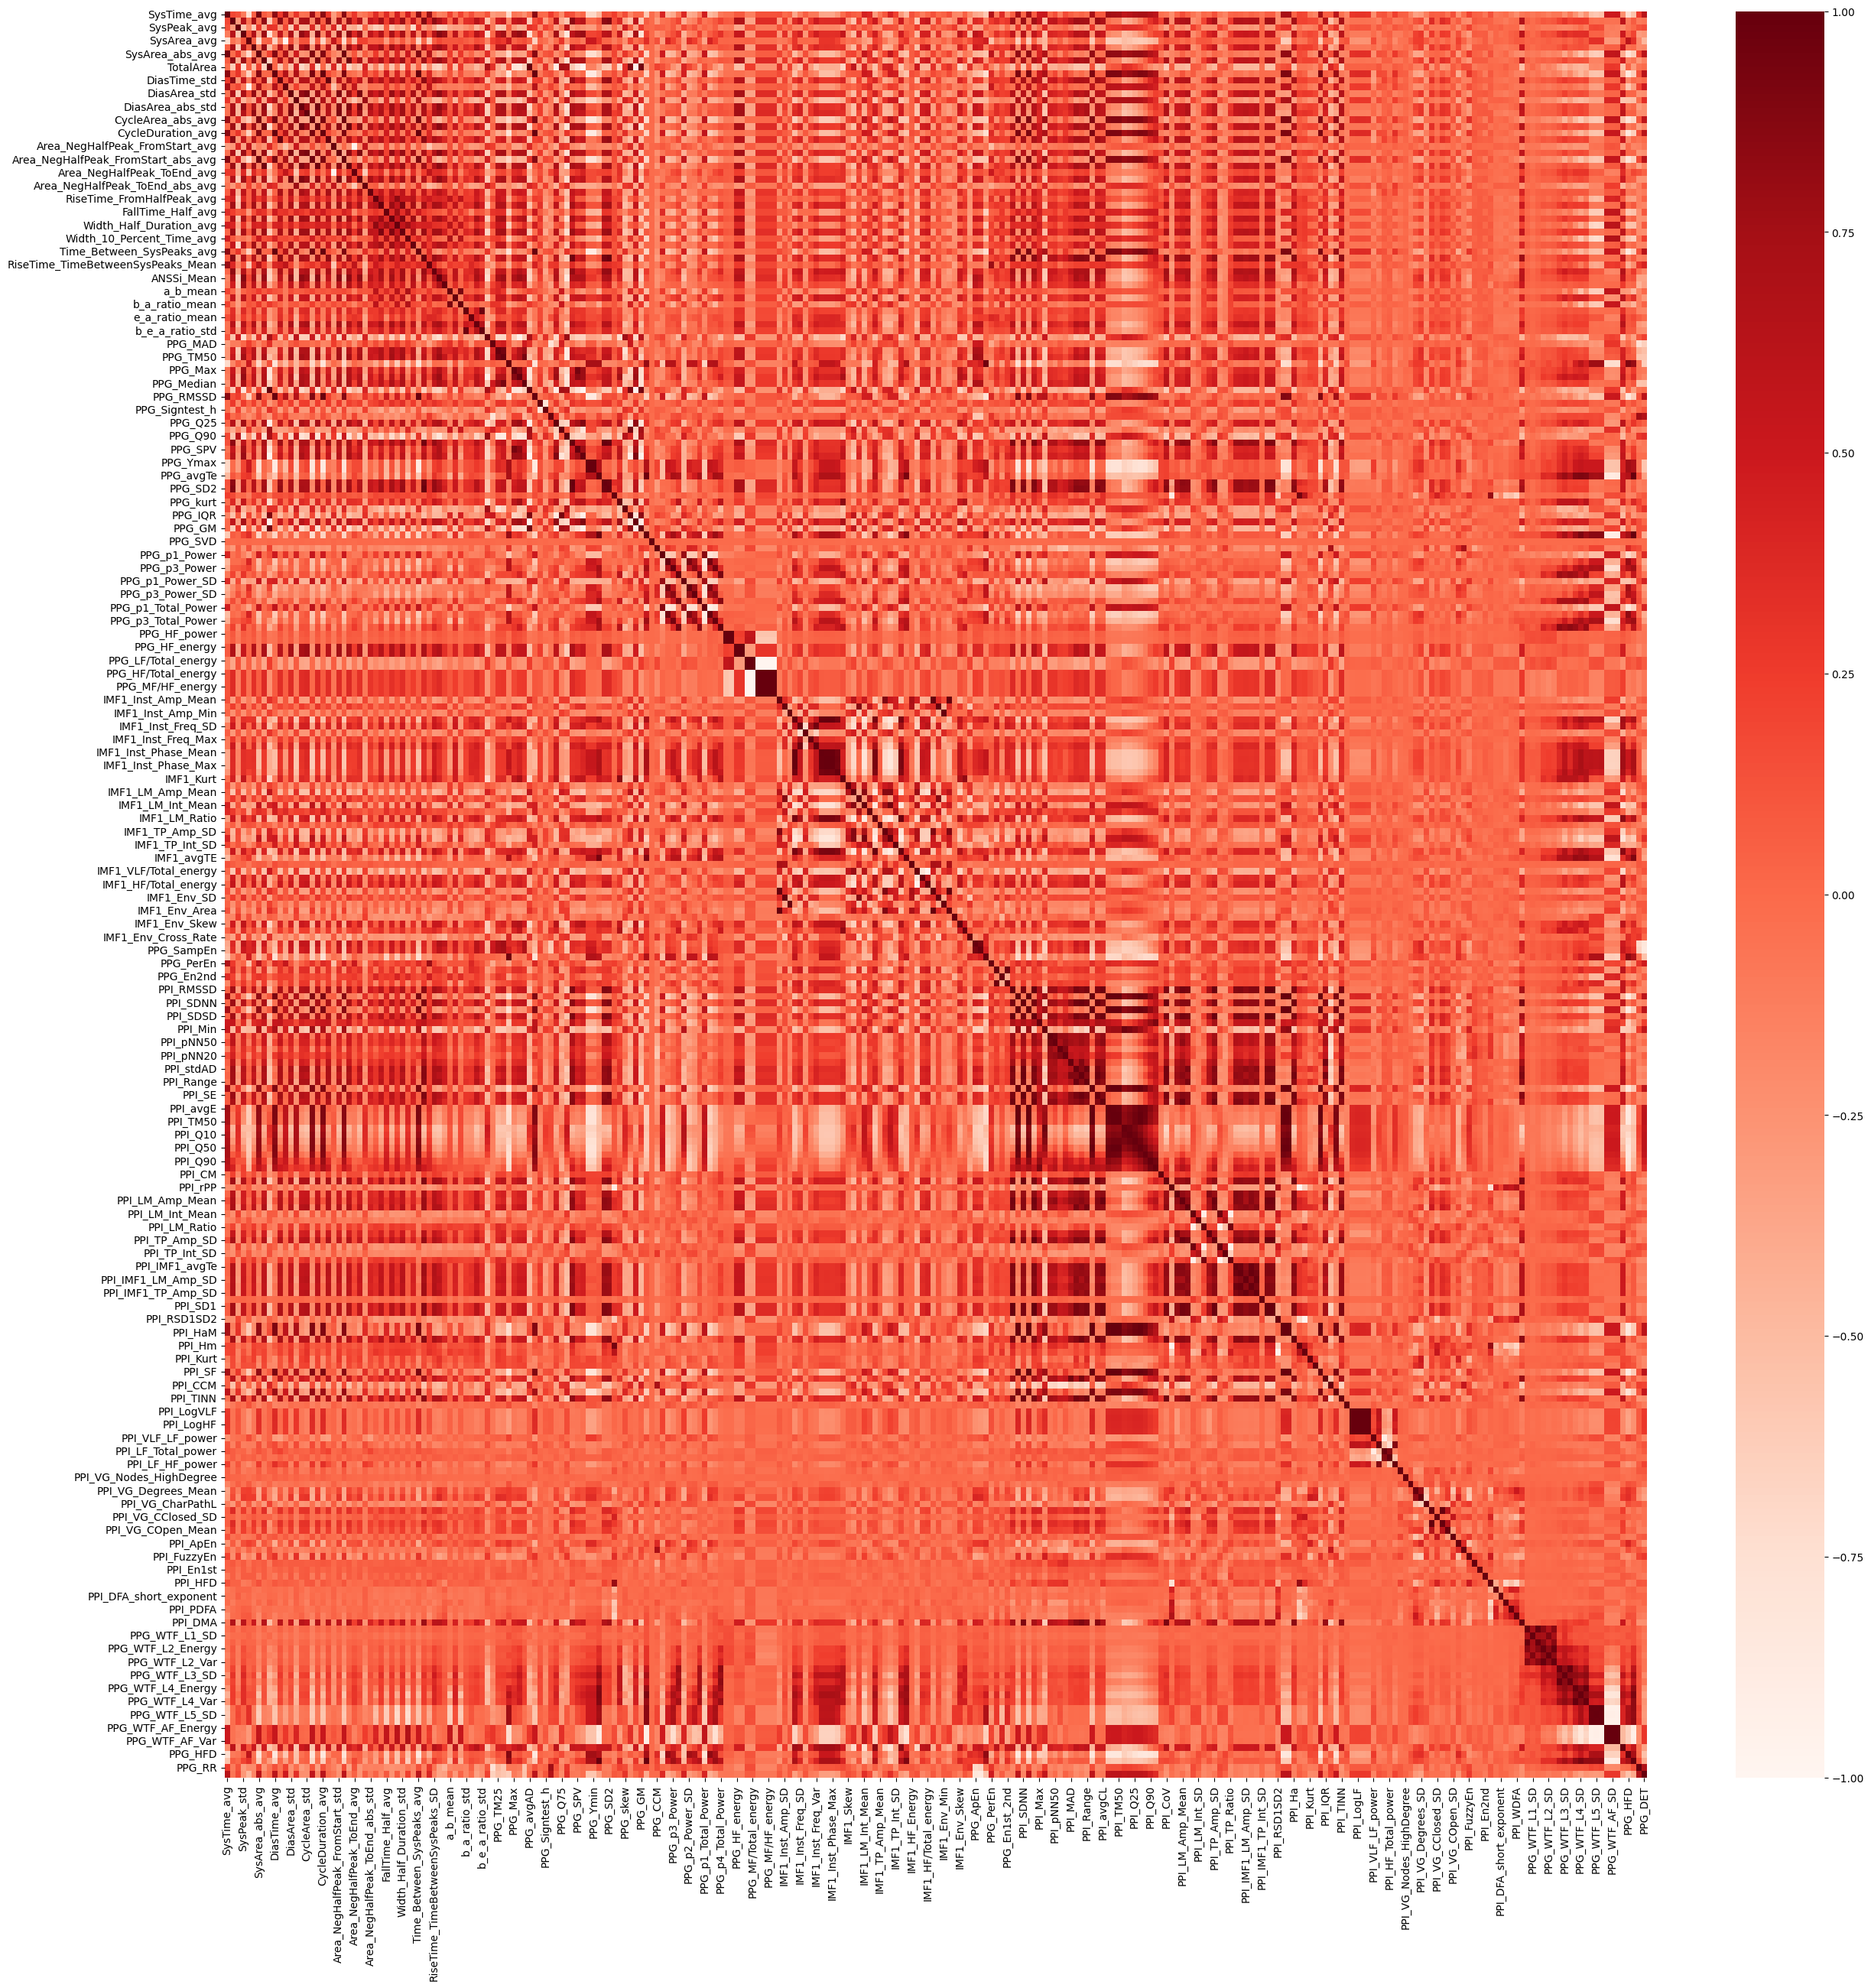

In [ ]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [ ]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Min', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_CoV', 'PPI_LM_Amp_Mean', 'PPI_TP_Amp_SD', 'PPI_TP_Int_Mean', 'PPI_IMF1_LM_Amp_Mean', 'PPI_IMF1_TP_Amp_Mean', 'PPI_IMF1_TP_Amp_SD', 'PPI_SD1', 

In [ ]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [ ]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_SD', 'PPI_VG_CharPathL', 'PPI_VG_CClosed_Mean', 'PPI_VG_CClosed_SD', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD', 'PPI_ApEn', 'PPI_SampEn', 'PPI_FuzzyEn', 'PPI_PerEn', 'PPI_En1

In [ ]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


In [ ]:
df_revised

,2_stages,SysTime_avg,SysTime_std,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,SysArea_abs_std,TotalArea,...,PPG_WTF_L3_Energy,PPG_WTF_L3_SD,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_WTF_AF_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0,0.243075,0.106977,2.051287,1.271953,-1.285312,14.791261,0.190149,0.285010,20.185956,...,2.630119,0.073414,73.786172,0.544357,469.265490,3326.216471,56.679685,1.596500,0.103262,0.916861
1,0,0.343277,0.225440,1.927268,1.754324,2.661957,17.248446,0.190526,0.227912,18.963432,...,14.351267,0.171489,124.451367,0.706797,986.855721,2731.753050,59.669821,1.481480,0.100278,0.961463
2,0,0.274200,0.101530,2.242864,1.318513,0.956881,15.603188,0.206661,0.128348,22.063562,...,2.109012,0.065740,47.301892,0.435842,452.286898,3424.140494,61.623213,1.512300,0.070013,0.889709
3,0,0.437240,0.398992,2.824896,1.867212,-1.905432,15.568619,0.304404,0.272068,21.087311,...,18.348238,0.193904,357.419869,1.197743,748.970794,2720.494751,62.408353,1.531390,0.075477,0.864056
4,0,0.274282,0.135000,2.913433,0.555042,1.484555,19.700900,0.274228,0.189381,25.268359,...,1.450890,0.054526,51.561563,0.455048,495.221854,3298.400148,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0,0.457332,0.147955,2.894850,0.439800,0.939364,7.744200,0.444941,0.150386,25.575405,...,0.705908,0.038033,12.749257,0.226207,291.749987,3568.318762,50.156012,1.312859,0.086904,0.944182
85538,0,0.418870,0.159254,2.790856,0.775927,3.364588,9.194997,0.412621,0.191717,25.140178,...,0.549422,0.033554,14.531636,0.241577,238.542476,3596.889402,51.241862,1.329070,0.086235,0.943974
85539,0,0.418692,0.121094,2.838916,0.431103,3.748585,6.014400,0.411671,0.143435,25.719602,...,0.758148,0.039415,13.286614,0.230992,255.100137,3622.677753,49.838657,1.319159,0.101377,0.951243
85540,0,0.412946,0.169847,2.848124,0.521313,2.600567,7.562719,0.405593,0.191824,25.362439,...,0.974665,0.044691,13.945365,0.236626,336.559393,3546.296684,50.857749,1.367742,0.084736,0.934705


# Prepare X and y

In [ ]:
# Load subjects
df_subjects = pd.read_csv("path_to_subjects_df.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['2_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['2_stages']
groups = df_revised['SubjectID']


# ADASYN balancing

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]

        # Impute missing values
        X_g = imputer.fit_transform(X_g)

        # Define the resampling pipeline
        resample_pipeline = Pipeline([
            ('adasyn', ADASYN(sampling_strategy='auto', n_neighbors = 5, random_state=42)),  # Oversample the minority class to 90% of the majority
        ])

        try:
            X_resampled_g, y_resampled_g = resample_pipeline.fit_resample(X_g, y_g)
        except ValueError:
            print(f"Resampling failed for group {group}, using original samples.")
            X_resampled_g, y_resampled_g = X_g, y_g  # Fallback to original data

        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))
        resampled_y.append(pd.Series(y_resampled_g))
        resampled_groups.extend([group] * len(y_resampled_g))

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)
# Then you can call this function as before:
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)


In [ ]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

2_stages
0    69754
1    69656
Name: count, dtype: int64


# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['DiasTime_std', 'DiasArea_std', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_abs_avg',
       'RiseTime_FromHalfPeak_std', 'FallTime_Half_std',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'PPG_Min',
       'PPG_TM25', 'PPG_TM50', 'PPG_Ymax', 'PPG_skew', 'PPG_HF/Total_energy',
       'IMF1_Inst_Amp_Min', 'IMF1_Inst_Freq_Mean', 'PPG_En1st', 'PPG_En2nd',
       'PPI_Min', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power',
       'PPI_LF_HF_power', 'PPI_VG_Nodes_HighDegree', 'PPI_ApEn', 'PPI_PerEn',
       'PPI_En1st', 'PPI_En2nd', 'PPG_LC'],
      dtype='object')


In [ ]:
X_selected = X_resampled[selected_features]
X_selected

,DiasTime_std,DiasArea_std,Area_NegHalfPeak_FromStart_avg,Area_NegHalfPeak_ToEnd_avg,Area_NegHalfPeak_ToEnd_abs_avg,RiseTime_FromHalfPeak_std,FallTime_Half_std,Width_Half_Duration_std,Width_10_Percent_Time_avg,Width_10_Percent_Time_std,...,PPI_VLF_LF_power,PPI_VLF_HF_power,PPI_LF_Total_power,PPI_LF_HF_power,PPI_VG_Nodes_HighDegree,PPI_ApEn,PPI_PerEn,PPI_En1st,PPI_En2nd,PPG_LC
0,0.146083,20.293817,17.410490,-15.377866,0.122107,0.025383,0.045370,0.070160,0.088601,0.041578,...,4.480785,73463.169709,0.222926,16395.156077,0.279070,0.377469,0.985228,0.978870,1.000000,56.679685
1,0.510562,27.929675,23.818025,-20.749097,0.224424,0.178933,0.133449,0.266984,0.119792,0.105064,...,3.853942,62471.308478,0.258651,16209.717965,0.333333,0.429715,0.992267,0.996317,0.975119,59.669821
2,0.147725,35.908480,20.078857,-20.758618,0.163108,0.042987,0.069931,0.090760,0.099276,0.032926,...,4.480376,73428.858423,0.222946,16388.995483,0.250000,0.413993,0.999526,0.998001,0.999473,61.623213
3,0.507860,29.642914,22.102188,-21.490199,0.175081,0.272336,0.241228,0.366583,0.144271,0.106760,...,4.151581,76204.505446,0.240414,18355.539623,0.478261,0.305522,0.994030,0.998364,0.970951,62.408353
4,0.250548,11.035044,25.067343,-23.335804,0.199192,0.077414,0.058262,0.112018,0.113809,0.057691,...,4.480636,73450.673267,0.222934,16392.912340,0.342857,0.444734,0.959687,0.918296,0.988699,56.876811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139405,0.256903,9.759965,32.308123,-30.679763,0.281492,0.022394,0.015313,0.021117,0.127528,0.018088,...,4.282871,72766.570042,0.233110,16989.105490,0.342884,0.024524,0.991113,0.999061,0.999746,48.734439
139406,0.240199,11.278653,32.577422,-30.291569,0.286218,0.012008,0.023079,0.031299,0.128384,0.009573,...,4.320835,75982.533070,0.231112,17586.305129,0.372429,0.057134,0.973936,0.999213,0.998567,49.493755
139407,0.240294,11.232643,32.564122,-30.325235,0.286261,0.012155,0.023349,0.031584,0.128671,0.009620,...,4.324120,75930.204500,0.230940,17561.197077,0.367945,0.052371,0.975035,0.998923,0.998541,49.482119
139408,0.231135,12.146434,32.696804,-29.876938,0.279350,0.015183,0.022944,0.035016,0.129081,0.010262,...,4.355599,75490.292091,0.229297,17334.665491,0.329522,0.102019,0.983608,0.993519,0.996210,49.588166


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 18, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 367}
Best score:  0.6117608572714924


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [True, False],
    'classifier__max_depth': [10, 18],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [4, 5, 6],
    'classifier__n_estimators': [367, 400]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)


# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 18, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 367}
Best score:  0.6192701523176779


# Model Training

## 5-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=6,
    n_estimators=367,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_5cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
0    14031
1    14010
Name: count, dtype: int64
Test set distribution: 2_stages
0    13641
1    13627
Name: count, dtype: int64
Test set distribution: 2_stages
0    14033
1    13876
Name: count, dtype: int64
Test set distribution: 2_stages
1    14084
0    14080
Name: count, dtype: int64
Test set distribution: 2_stages
1    14059
0    13969
Name: count, dtype: int64
Accuracy       0.804489
Sensitivity    0.904863
Specificity    0.704239
Precision      0.753331
F1 Score       0.822098
MCC            0.621998
dtype: float64
Accuracy       0.020918
Sensitivity    0.028923
Specificity    0.018945
Precision      0.016649
F1 Score       0.020402
MCC            0.043979
dtype: float64
Final Confusion Matrix:
 [[49125 20629]
 [ 6632 63024]]
Overall Accuracy: 0.8044544867656552
Overall Sensitivity (Recall): 0.9047892500287126
Overall Specificity: 0.7042606875591364
Overall Precision: 0.7533979654047075
Overall F1 Score: 0.8221826507250063
Overall MCC: 1.4412549275

<ipython-input-18-f6c7a02f790f>:98: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


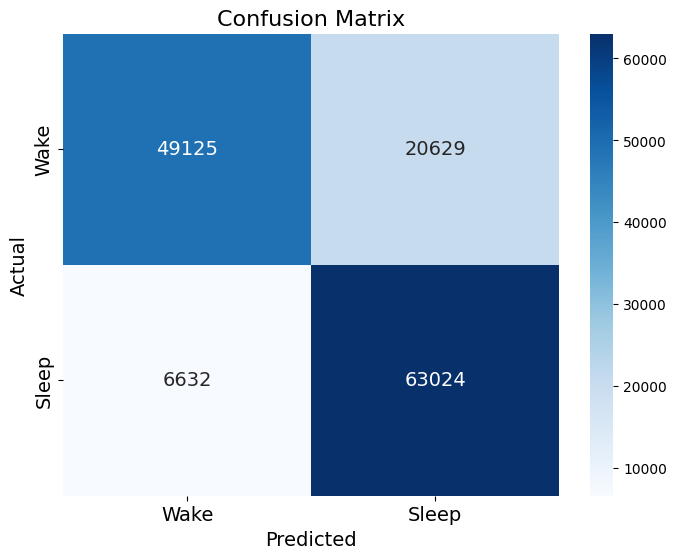

In [ ]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = final_confusion_matrix_5cv

plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature Importance

Top 10 Most Important Features:
                              Feature  Importance
28                    PPI_LF_HF_power    0.107231
25                   PPI_VLF_LF_power    0.104754
27                 PPI_LF_Total_power    0.103946
26                   PPI_VLF_HF_power    0.096787
18                           PPG_skew    0.030596
15                           PPG_TM25    0.030147
17                           PPG_Ymax    0.025835
5           RiseTime_FromHalfPeak_std    0.024775
31                          PPI_PerEn    0.023541
21                IMF1_Inst_Freq_Mean    0.023219
16                           PPG_TM50    0.022307
13                      e_a_ratio_std    0.021233
33                          PPI_En2nd    0.020609
24                            PPI_Min    0.020347
8           Width_10_Percent_Time_avg    0.020171
10  RiseTime_TimeBetweenSysPeaks_Mean    0.019754
12                     e_a_ratio_mean    0.019742
34                             PPG_LC    0.018949
4      Area_NegHal

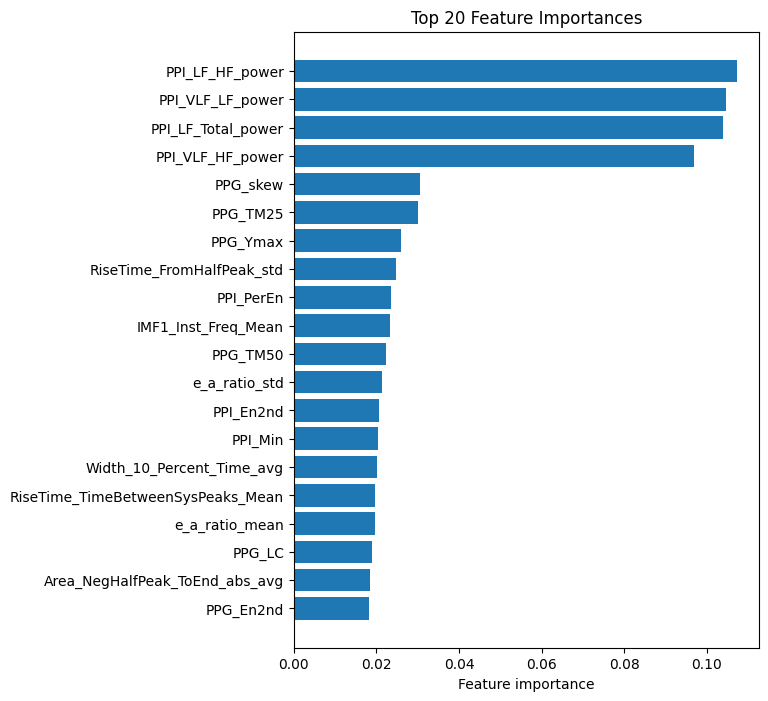

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_cv5 = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 10 features

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df_cv5)

# Optional: plot the top 10 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_cv5['Feature'], importance_df_cv5['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

## 10-fold CV

In [ ]:
# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=16,
    max_features='log2',
    min_samples_leaf=10,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
1    7210
0    7148
Name: count, dtype: int64
Test set distribution: 2_stages
0    6827
1    6789
Name: count, dtype: int64
Test set distribution: 2_stages
1    6862
0    6855
Name: count, dtype: int64
Test set distribution: 2_stages
0    7256
1    7211
Name: count, dtype: int64
Test set distribution: 2_stages
1    7200
0    7055
Name: count, dtype: int64
Test set distribution: 2_stages
1    6873
0    6846
Name: count, dtype: int64
Test set distribution: 2_stages
0    7259
1    7124
Name: count, dtype: int64
Test set distribution: 2_stages
1    6839
0    6779
Name: count, dtype: int64
Test set distribution: 2_stages
0    6876
1    6755
Name: count, dtype: int64
Test set distribution: 2_stages
0    6853
1    6793
Name: count, dtype: int64
Accuracy       0.798998
Sensitivity    0.884925
Specificity    0.713256
Precision      0.756184
F1 Score       0.814454
MCC            0.609334
dtype: float64
Accuracy       0.026437
Sensitivity    0.052432
Specificity  

<ipython-input-23-d417334c5177>:97: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


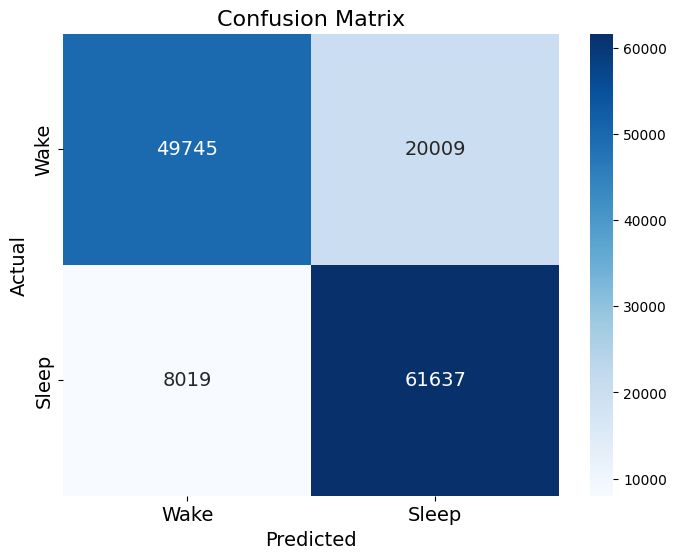

In [ ]:
# Plot the confusion matrix
cm = final_confusion_matrix_10cv

plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

Top 10 Most Important Features:
                              Feature  Importance
28                    PPI_LF_HF_power    0.119355
25                   PPI_VLF_LF_power    0.115989
26                   PPI_VLF_HF_power    0.113549
27                 PPI_LF_Total_power    0.106963
17                           PPG_Ymax    0.029752
21                IMF1_Inst_Freq_Mean    0.027118
18                           PPG_skew    0.027090
5           RiseTime_FromHalfPeak_std    0.024754
31                          PPI_PerEn    0.024527
24                            PPI_Min    0.023258
15                           PPG_TM25    0.022359
14                            PPG_Min    0.019707
7             Width_Half_Duration_std    0.019076
13                      e_a_ratio_std    0.019047
34                             PPG_LC    0.017513
33                          PPI_En2nd    0.017140
10  RiseTime_TimeBetweenSysPeaks_Mean    0.017125
4      Area_NegHalfPeak_ToEnd_abs_avg    0.016604
8           Width_

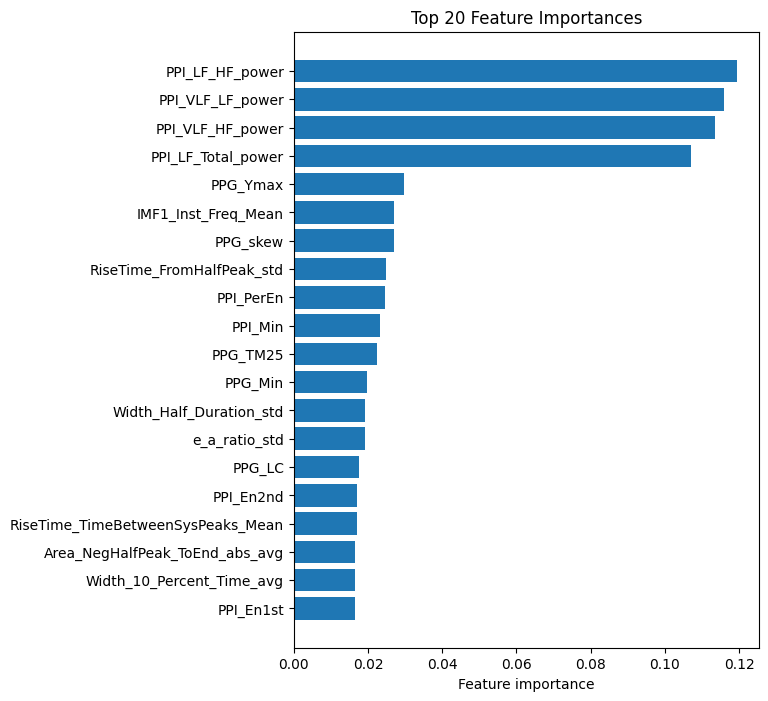

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances_cv10 = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_10cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_cv10
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 10 features

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df_10cv)

# Optional: plot the top 10 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_10cv['Feature'], importance_df_10cv['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

## 20-fold CV

In [ ]:
# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=16,
    max_features='log2',
    min_samples_leaf=10,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
1    3761
0    3638
Name: count, dtype: int64
Test set distribution: 2_stages
0    3444
1    3430
Name: count, dtype: int64
Test set distribution: 2_stages
0    3467
1    3418
Name: count, dtype: int64
Test set distribution: 2_stages
1    3441
0    3411
Name: count, dtype: int64
Test set distribution: 2_stages
0    3472
1    3419
Name: count, dtype: int64
Test set distribution: 2_stages
1    3431
0    3420
Name: count, dtype: int64
Test set distribution: 2_stages
1    3467
0    3396
Name: count, dtype: int64
Test set distribution: 2_stages
1    3383
0    3381
Name: count, dtype: int64
Test set distribution: 2_stages
1    3815
0    3770
Name: count, dtype: int64
Test set distribution: 2_stages
1    3379
0    3368
Name: count, dtype: int64
Test set distribution: 2_stages
0    3427
1    3354
Name: count, dtype: int64
Test set distribution: 2_stages
0    3448
1    3403
Name: count, dtype: int64
Test set distribution: 2_stages
1    3425
0    3416
Name: count,

<ipython-input-31-5098d0059c86>:97: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


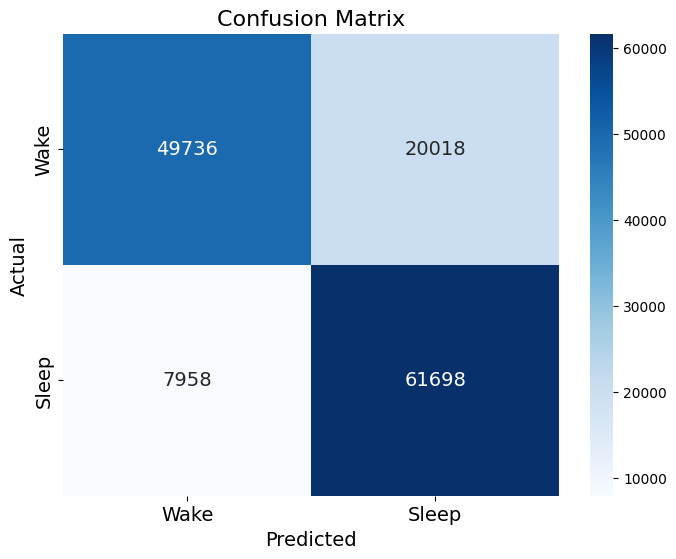

In [ ]:
# Plot the confusion matrix
cm = final_confusion_matrix_20cv

plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

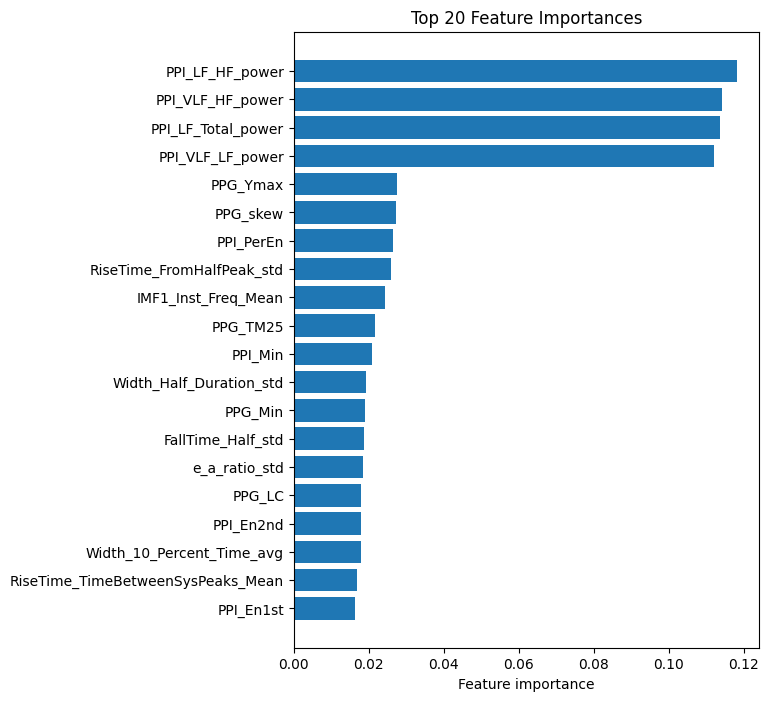

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_20cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 10 features

# Optional: plot the top 10 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_20cv['Feature'], importance_df_20cv['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Overall feature importances

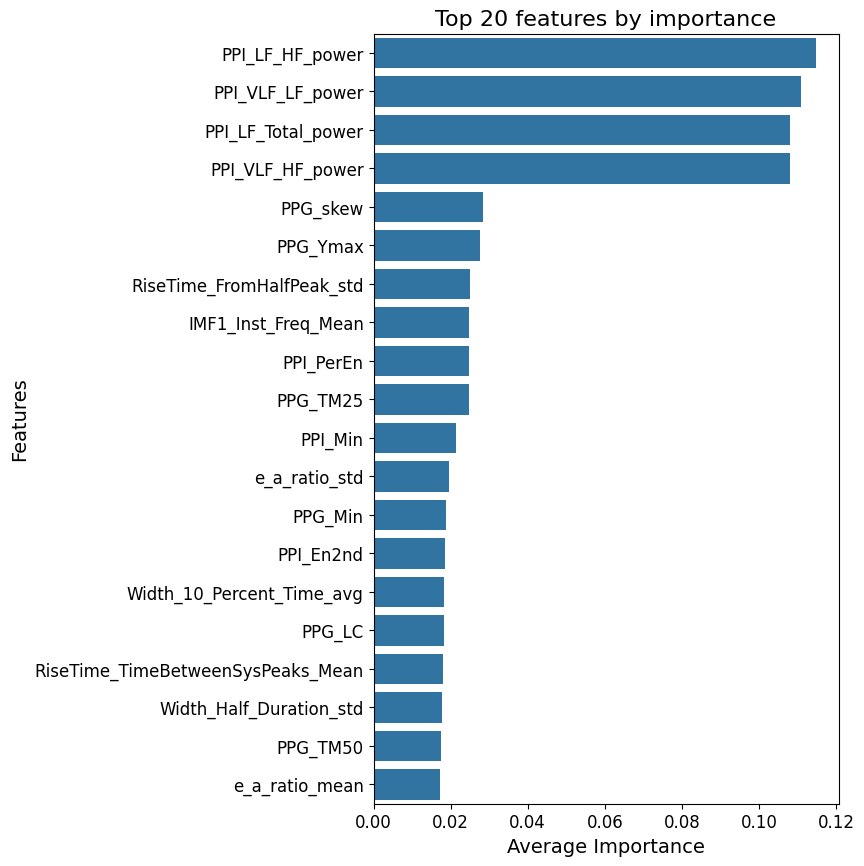

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Now, calculate the mean importance across the three DataFrames
mean_importance_df = pd.concat([importance_df_10cv, importance_df_cv5, importance_df_20cv], axis=1).mean(axis=1)

# Reset the index to turn the features back into a column
mean_importance_df = mean_importance_df.reset_index().rename(columns={0: 'Importance'})

# Sort the DataFrame by importance and take the top 10 features
top_10_features = mean_importance_df.nlargest(20, 'Importance')

# Now, plot the barplot of the top 10 features
plt.figure(figsize=(6, 10))
barplot = sns.barplot(data=top_10_features, x='Importance', y='Feature')

# Adding plot details
plt.title('Top 20 features by importance', fontsize=16)
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Show the plot
plt.show()


In [ ]:
top_12_features = mean_importance_df['Feature'].head(12).tolist()
print(top_12_features)

['PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPG_Ymax', 'IMF1_Inst_Freq_Mean', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'PPI_PerEn', 'PPI_Min', 'PPG_TM25', 'PPG_Min']


In [ ]:
top_20_features = X_resampled[['PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPG_Ymax', 'IMF1_Inst_Freq_Mean', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'PPI_PerEn', 'PPI_Min', 'PPG_TM25', 'PPG_Min']]

<ipython-input-52-cc711b38f686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_features['class']= top_20_features['class'].map(class_mapping)


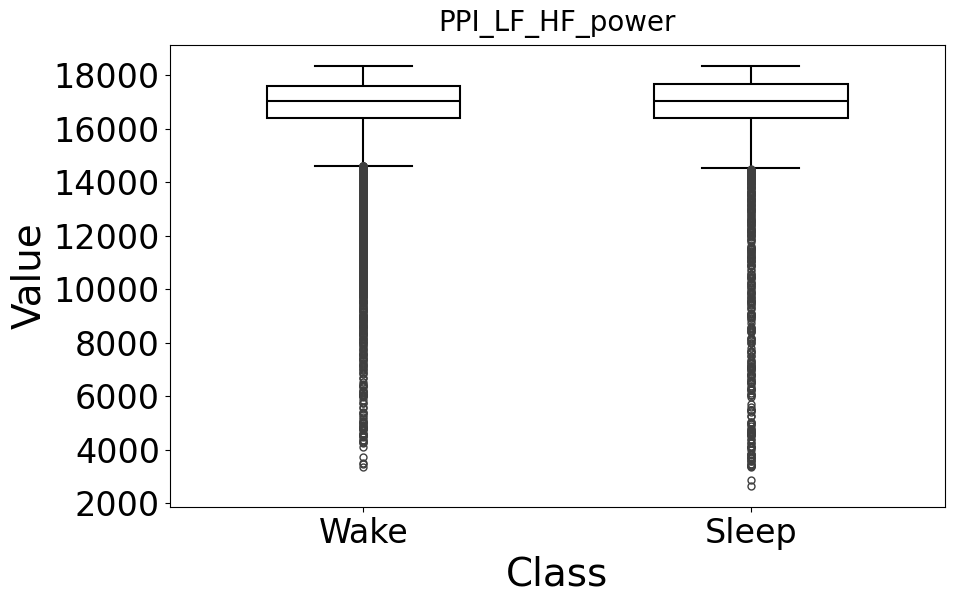

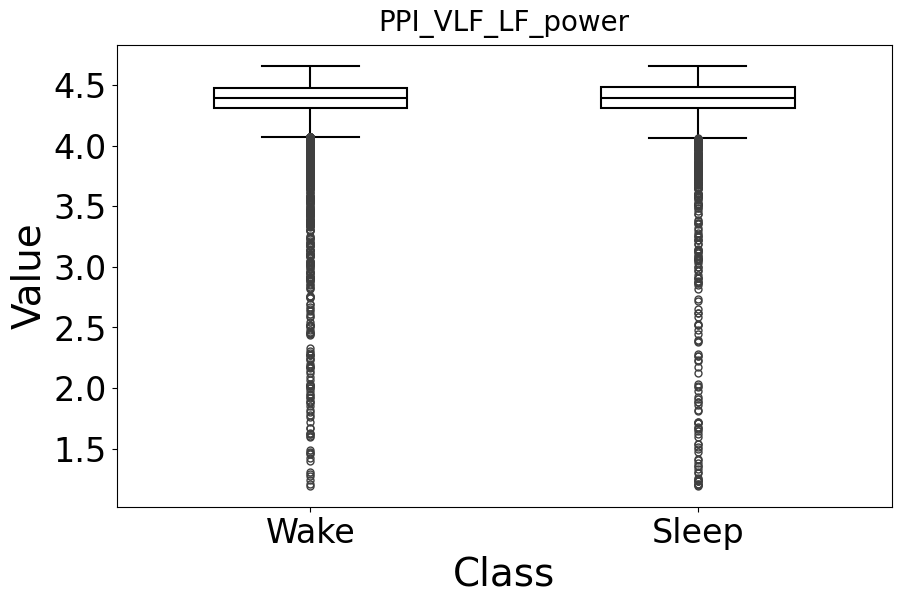

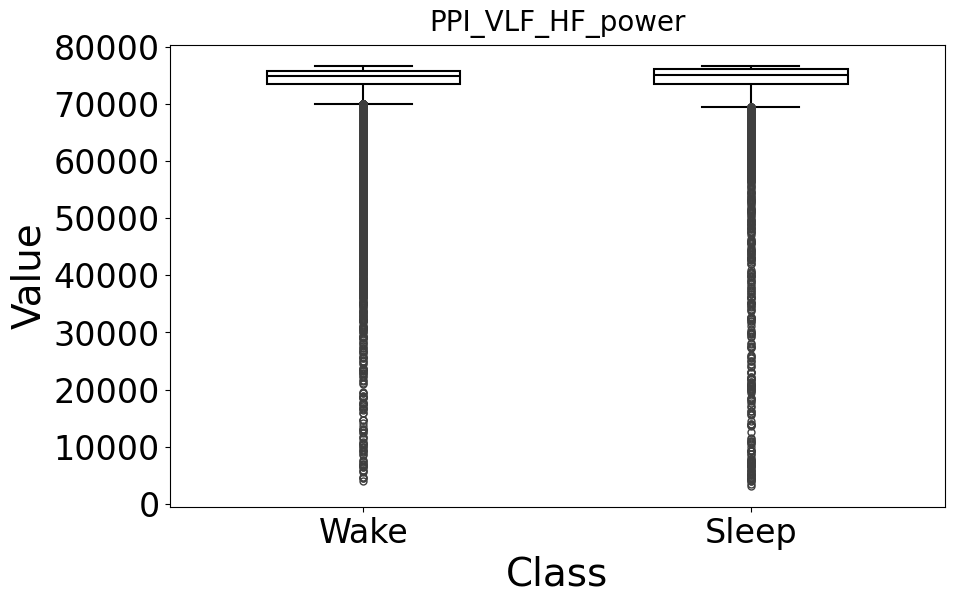

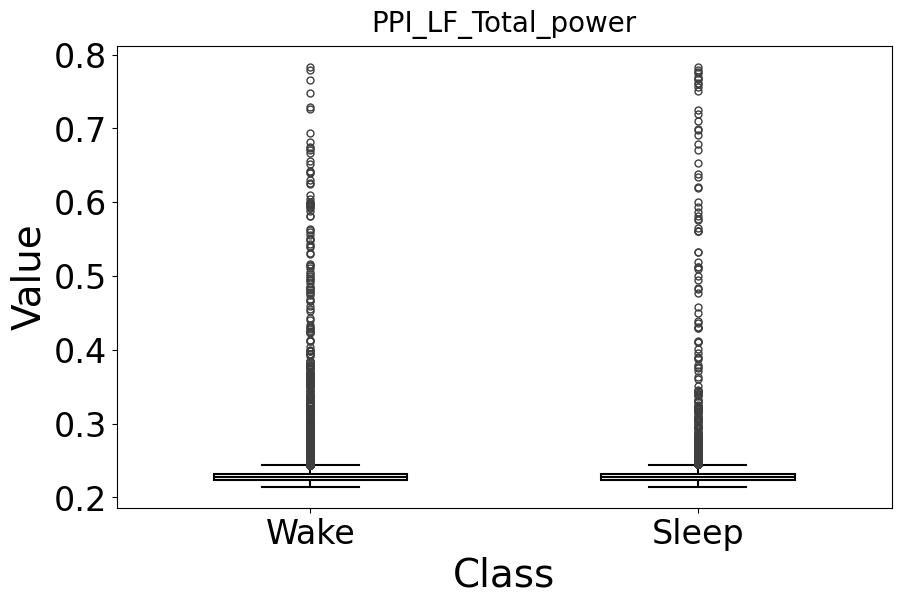

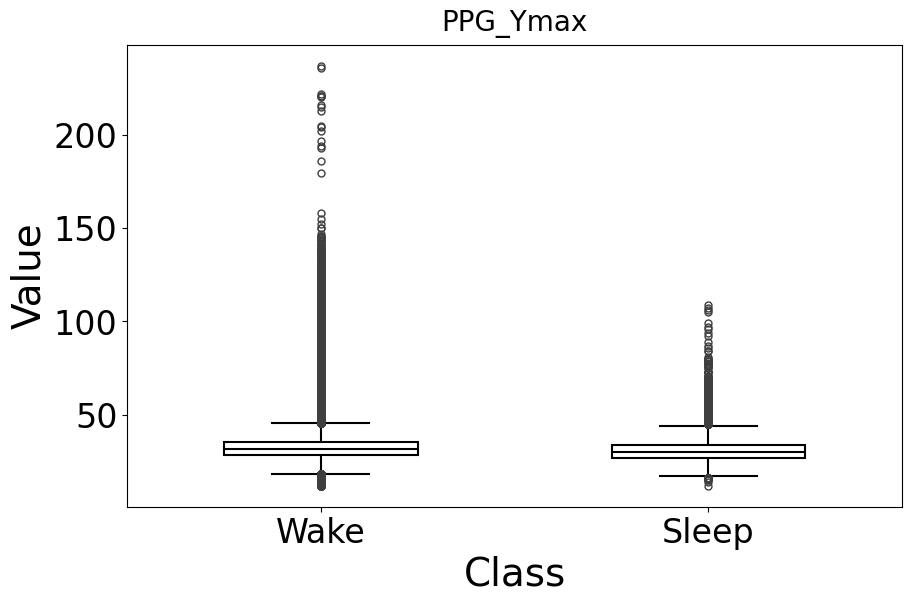

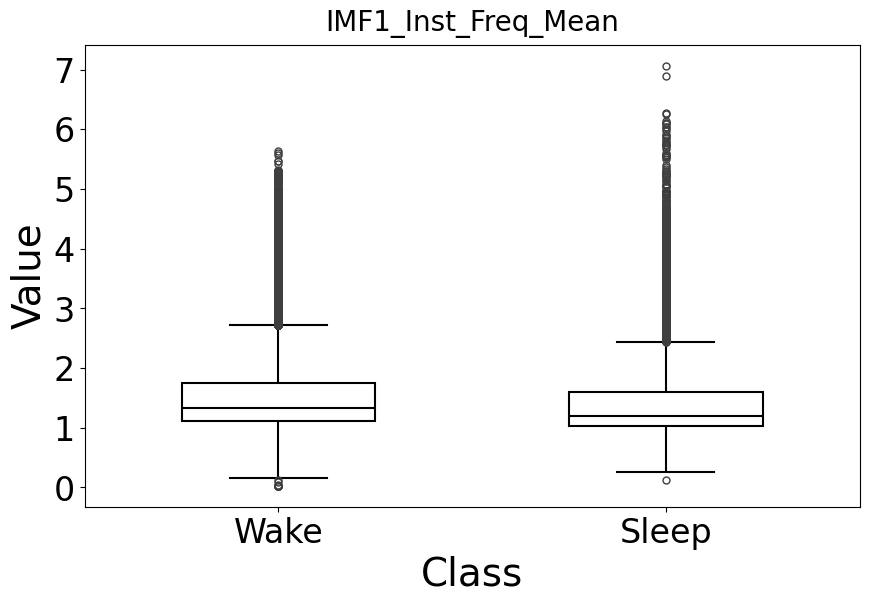

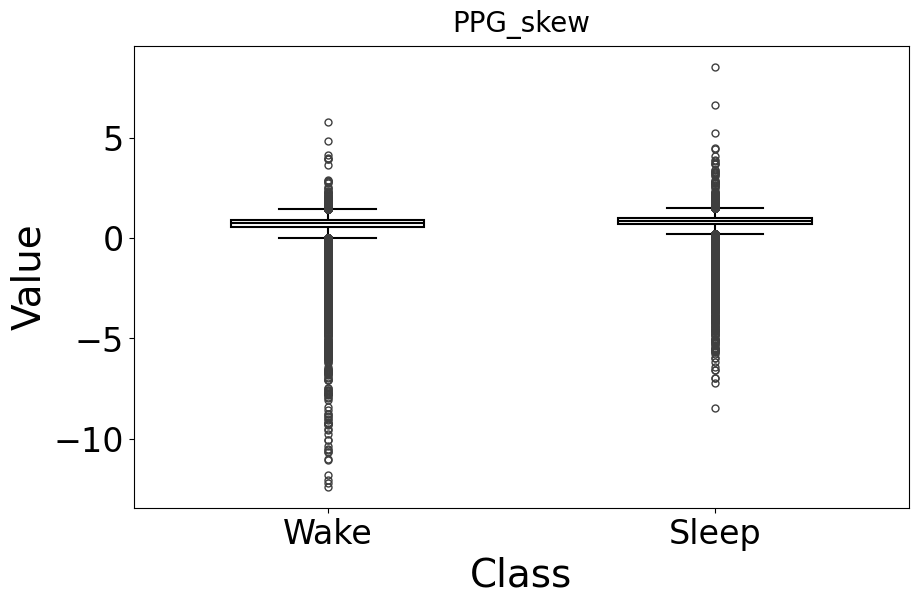

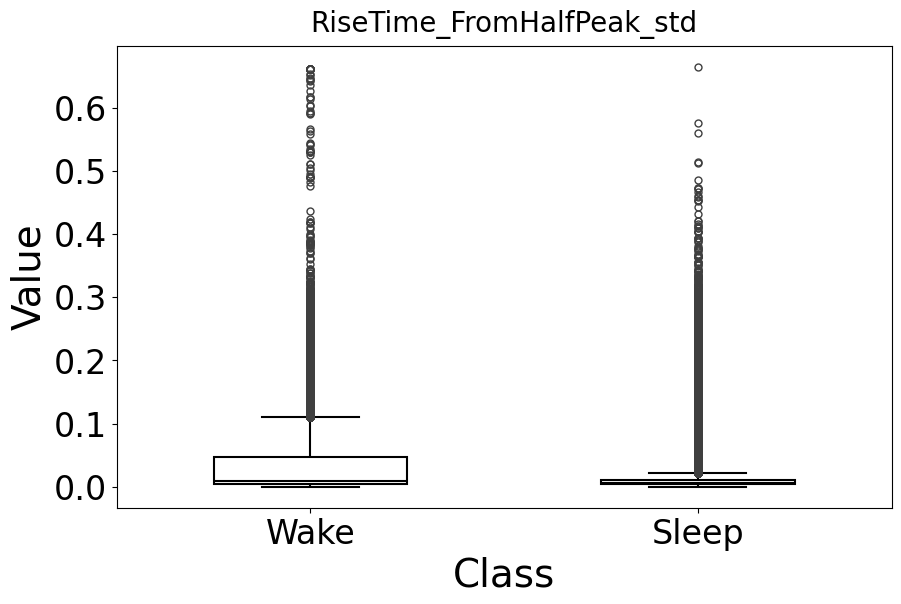

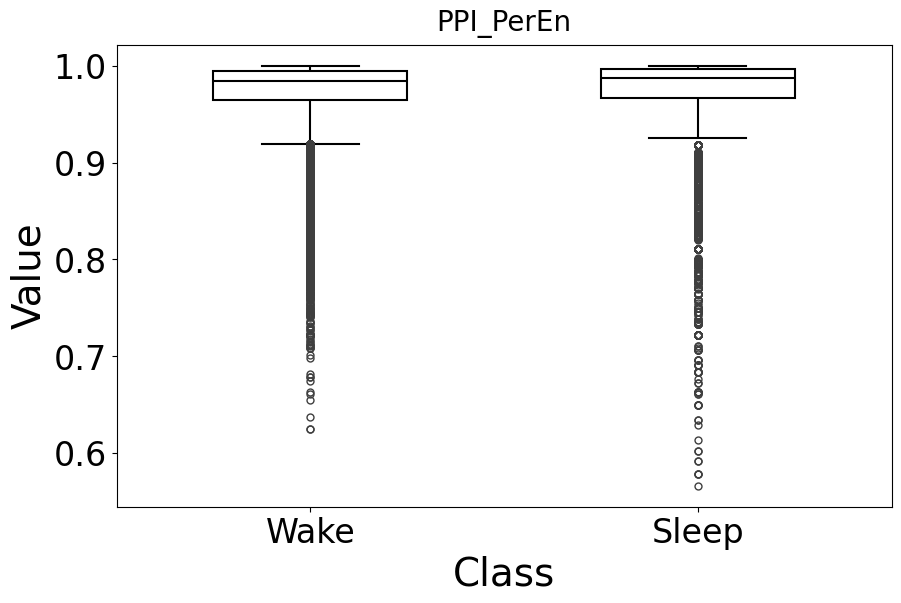

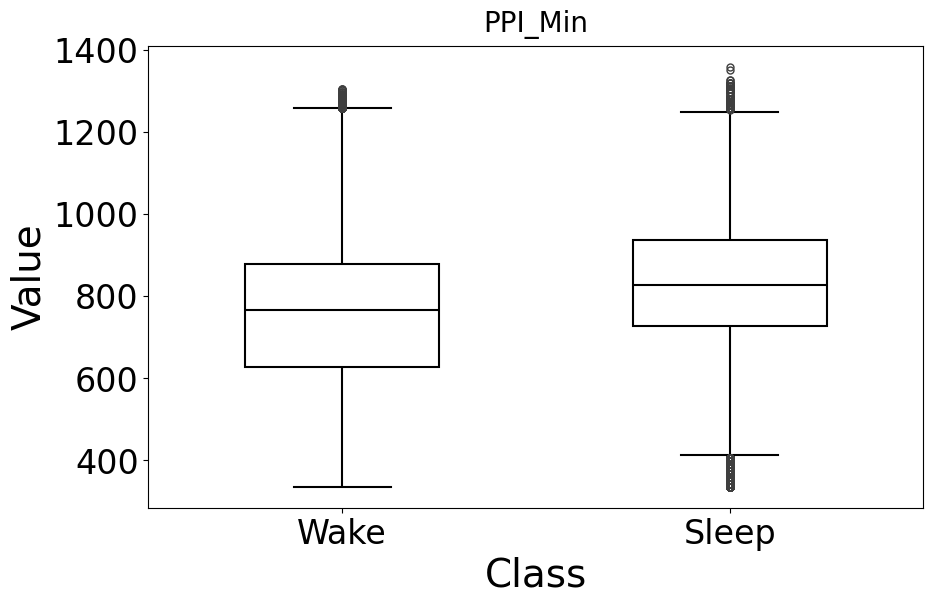

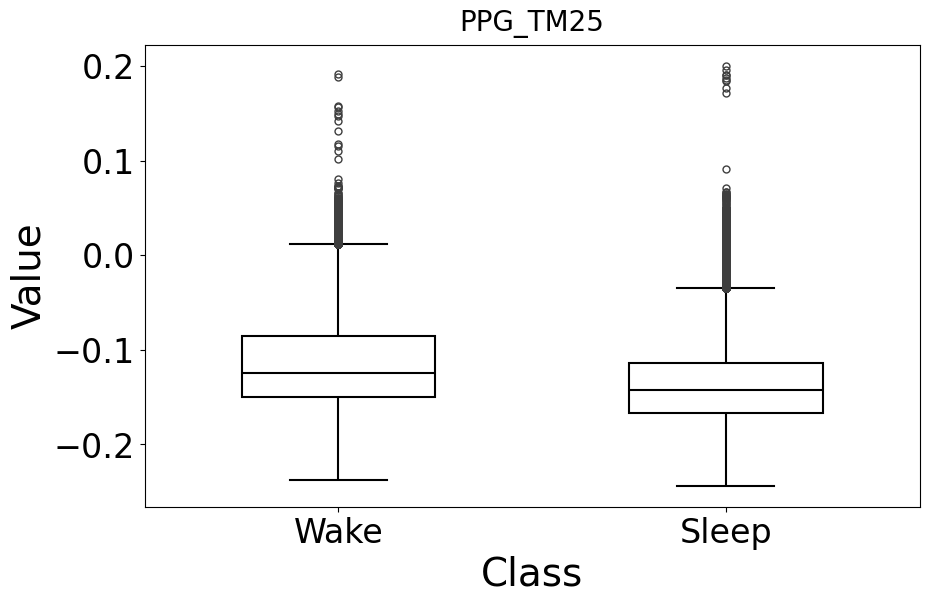

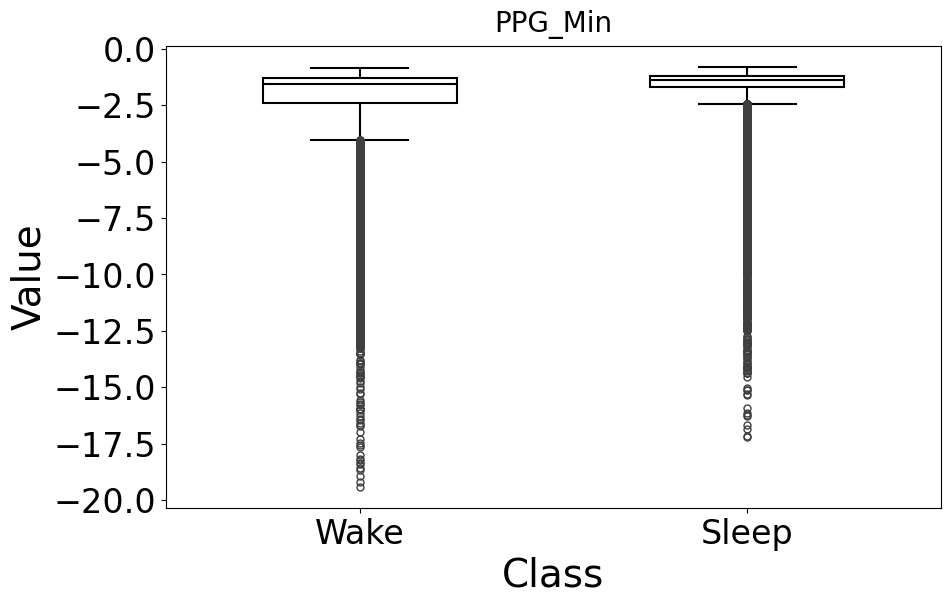

In [ ]:
class_mapping = {0: "Wake", 1: "Sleep"}  # Make sure to include all original classes
top_20_features['class']= top_20_features['class'].map(class_mapping)

# Assuming top_20_features is your DataFrame
feature_names = top_20_features.drop(columns='class').columns  # Exclude 'class' column from features

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot with correctly specified properties
    sns.boxplot(x='class', y=feature, data=top_20_features,
                width=0.5,  # Box width
                fliersize=5,  # Outlier marker size
                linewidth=1.5,  # Line width of the boxes
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},  # Box fill and edge color
                whiskerprops={'color': 'black'},  # Whisker color
                capprops={'color': 'black'},  # Caps color
                medianprops={'color': 'black'})  # Median line color

    plt.title(f'{feature}', fontsize=20, pad =10)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.show()

<ipython-input-53-f75dabf6a8b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_features['class'] = y_resampled  # Ensure class labels are added to the DataFrame


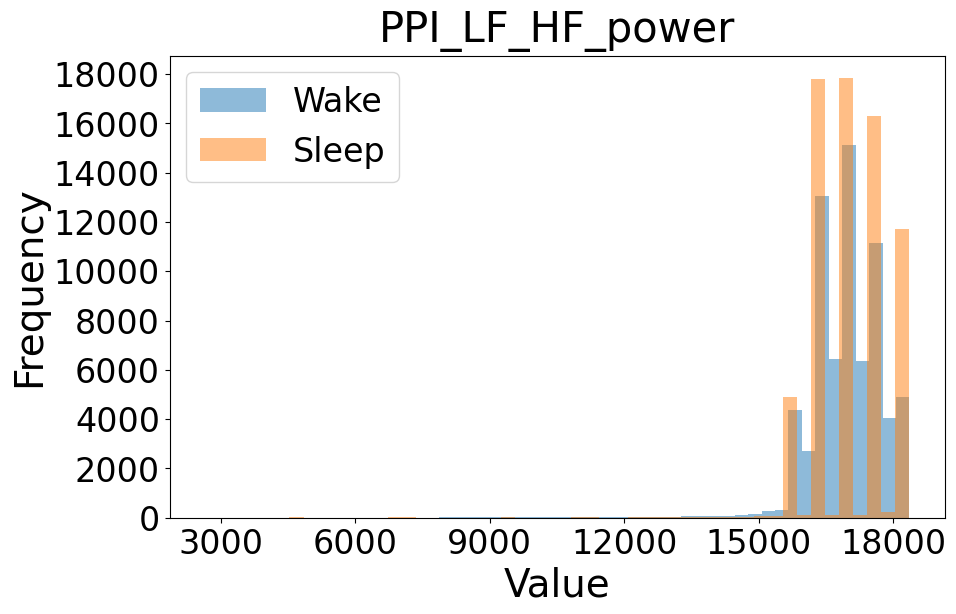

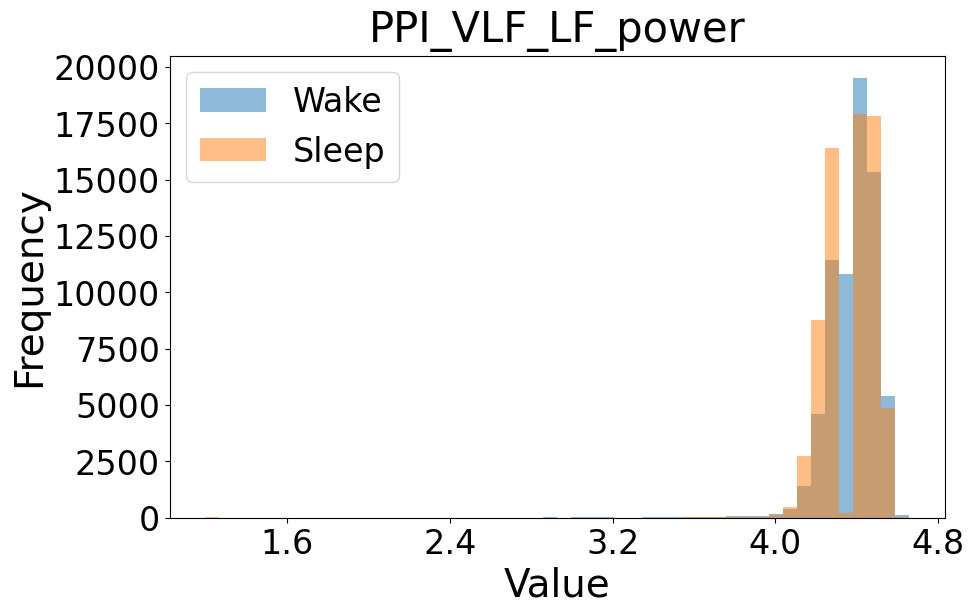

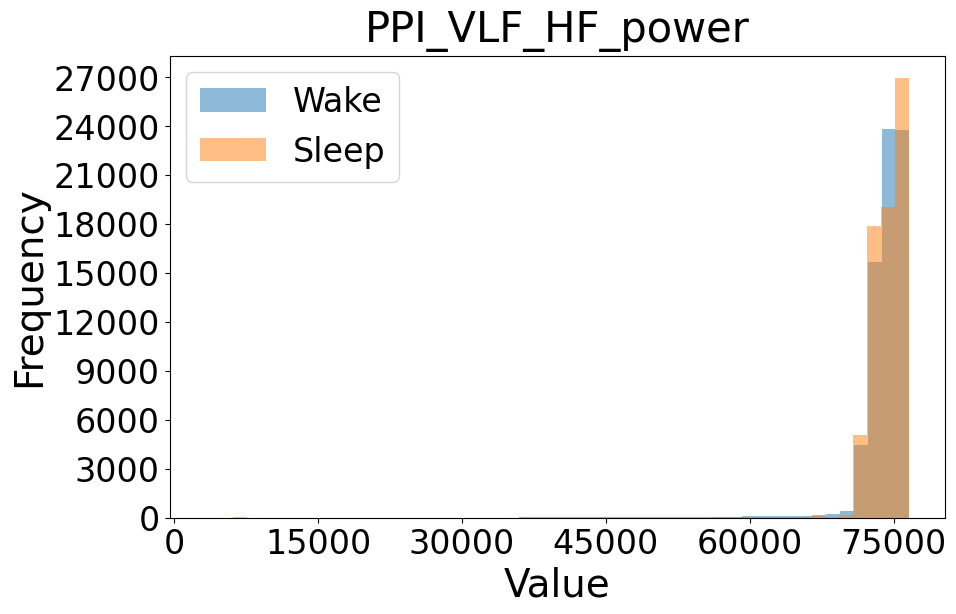

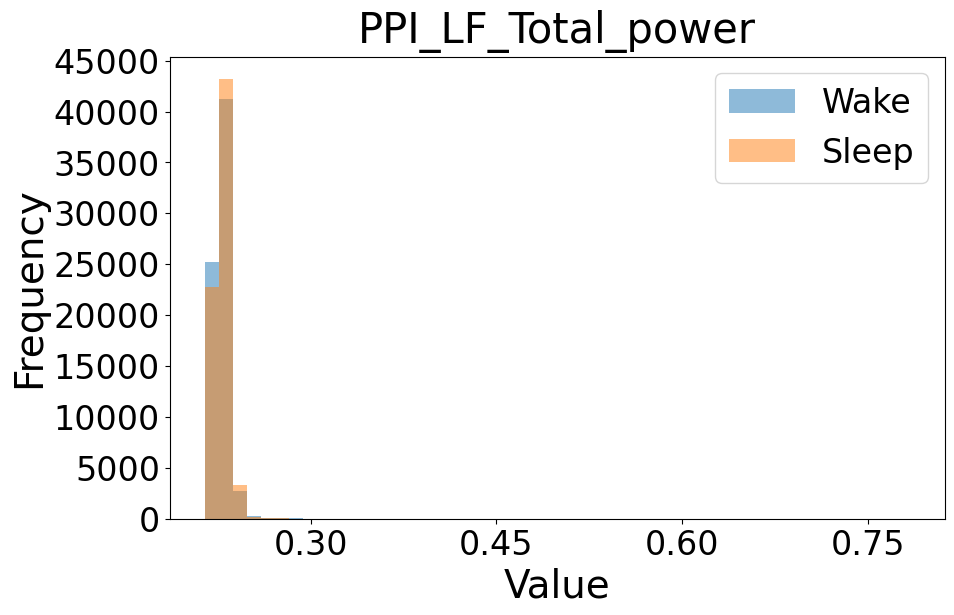

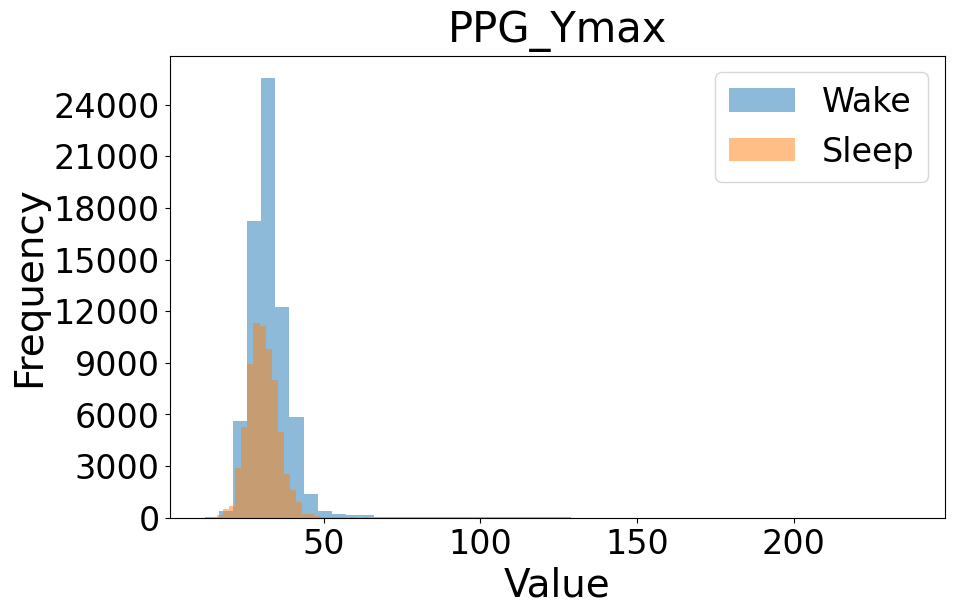

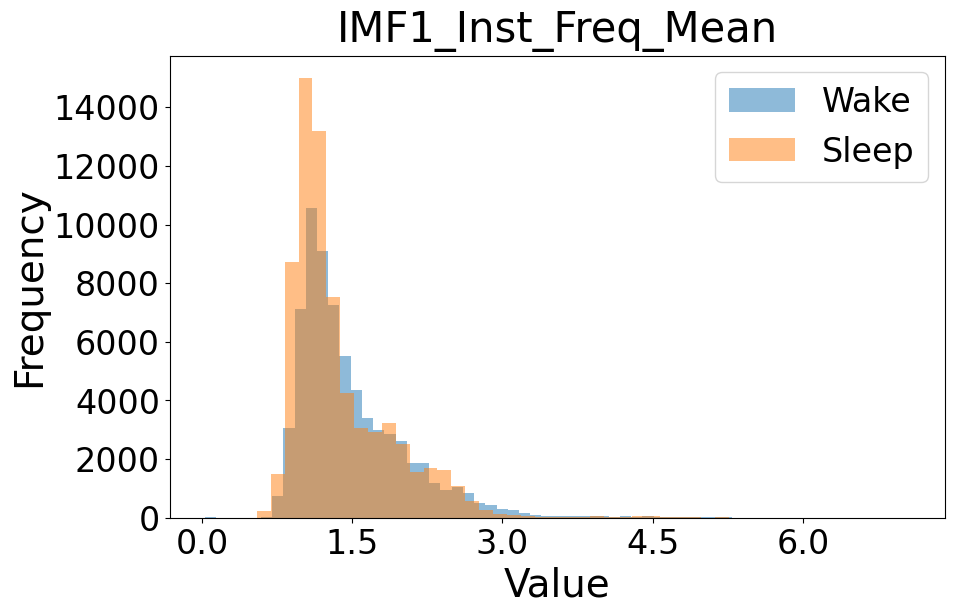

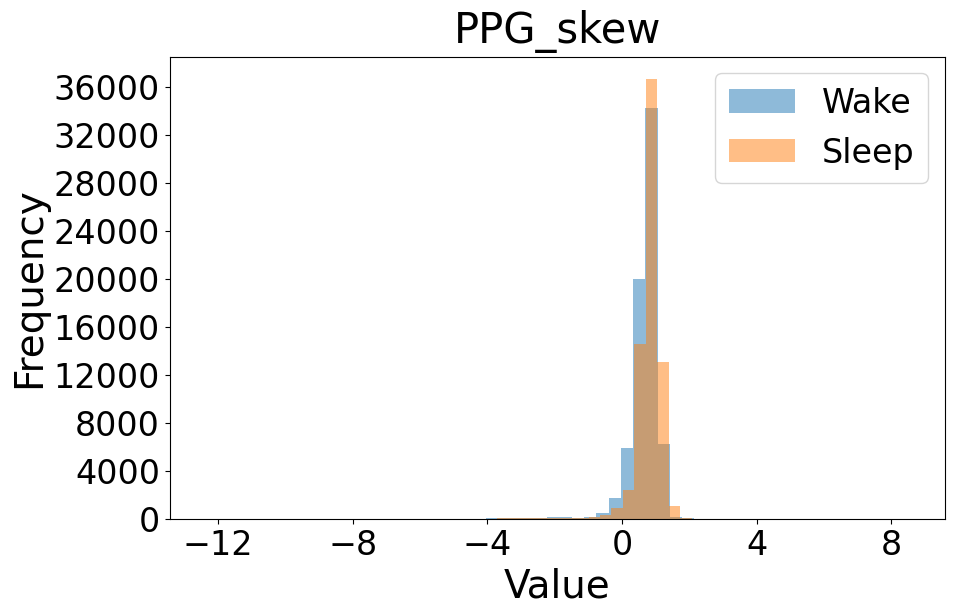

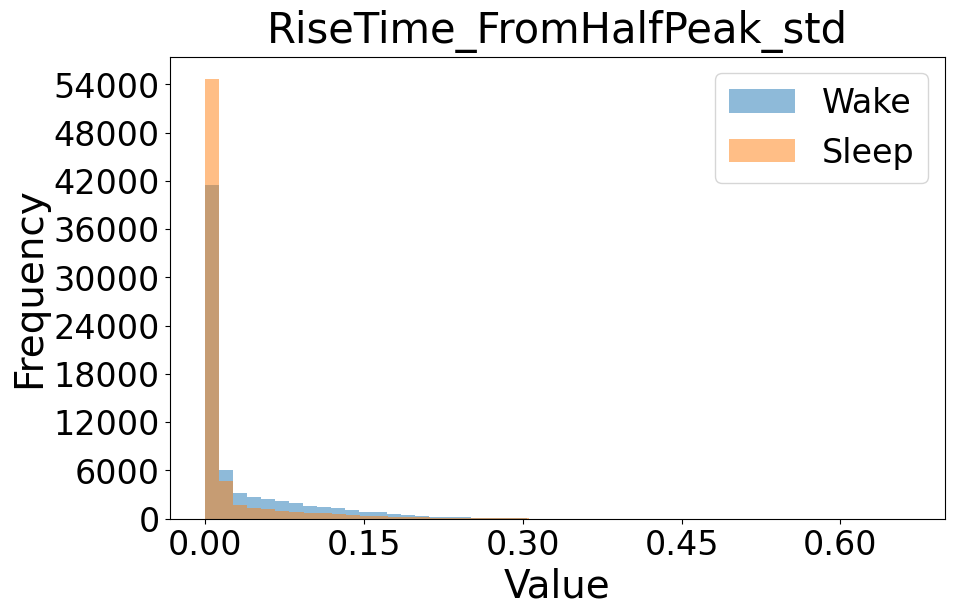

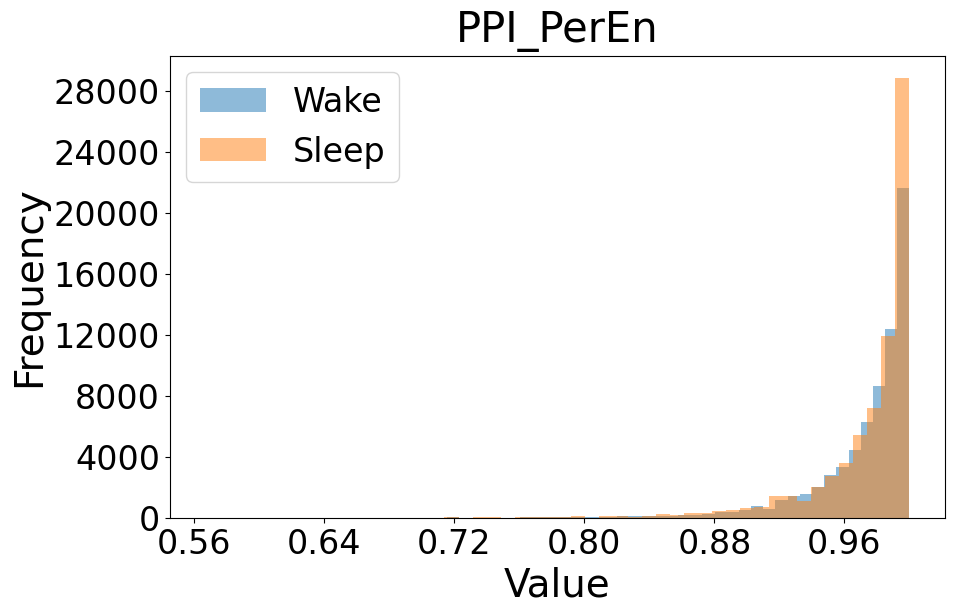

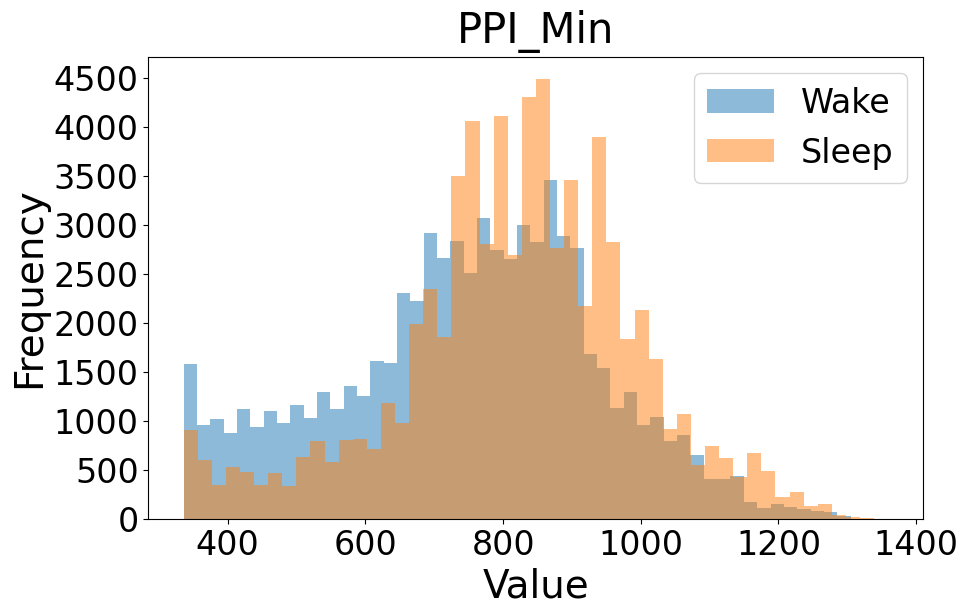

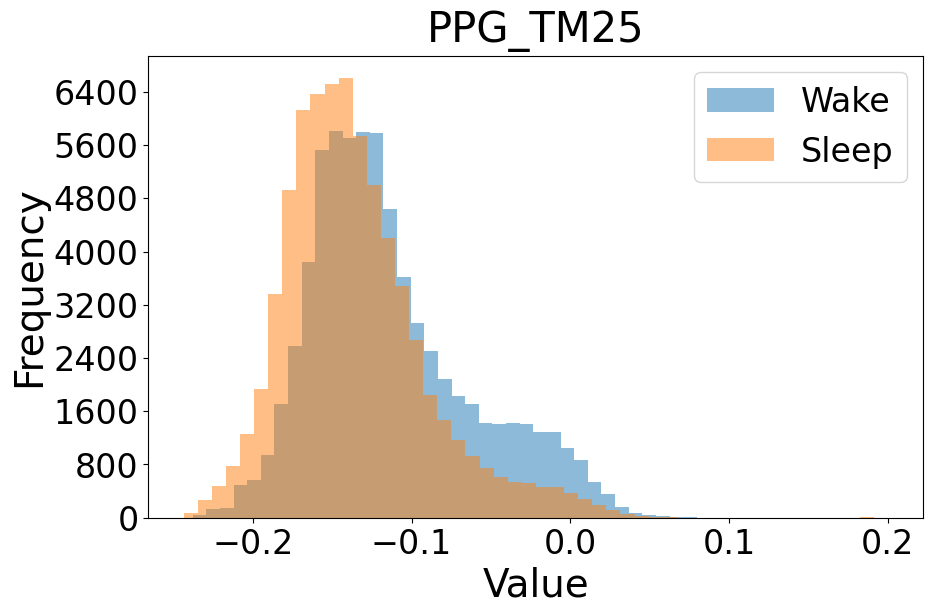

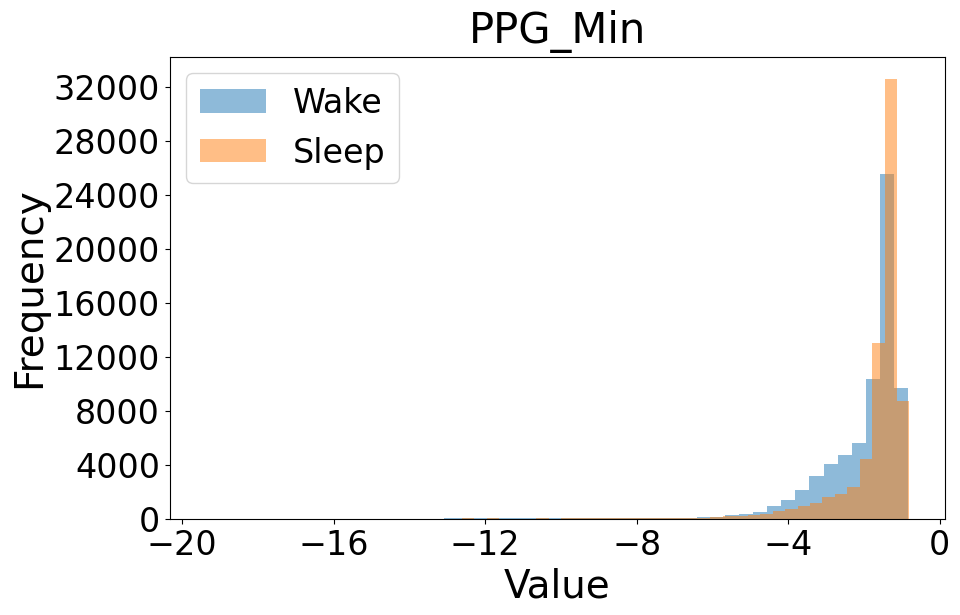

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

class_labels = {
    0: "Wake",
    1: "Sleep"
}

# Assuming 'top_20_features' DataFrame and 'y_resampled' are defined and correct
top_20_features['class'] = y_resampled  # Ensure class labels are added to the DataFrame

feature_names = top_20_features.columns.drop('class')  # Exclude the 'class' column for feature iteration
for feature in feature_names:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get the current Axes instance on the current figure

    # Plot histogram for each class
    for class_value in np.unique(y_resampled):
        subset = top_20_features[top_20_features['class'] == class_value]
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])

    plt.title(f'{feature}', fontsize=30, pad = 10)
    plt.xlabel('Value', fontsize=28)
    plt.ylabel('Frequency', fontsize=28)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)

    # Set x-axis major locator to limit the number of ticks to a maximum of 6
    ax.xaxis.set_major_locator(MaxNLocator(6))

    # Optionally, set y-axis major locator
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='upper'))  # This limits y-axis ticks to integers and prunes the upper tick

    plt.show()
